# Import

In [1]:
from CNN import CNN
from Utils import *
import os
from torch.utils.data import DataLoader

PATH_PROJECT_ROBIN = "/home/robin/Bureau/ETUDES/M2/S2/TAP/"
PATH_PROJECT_QUENTIN = "..."
PATH_PROJECT_PERSONNE = PATH_PROJECT_ROBIN
PATH_RAW_DATASET = "Projet-Traitement-Automatique-de-la-Parole/Dataset/"
GLOBAL_PATH_DATASET = os.path.join(PATH_PROJECT_PERSONNE, PATH_RAW_DATASET)
GLOBAL_PATH_RAW_DATASET = os.path.join(GLOBAL_PATH_DATASET, "speech_commands_v0.02/")
GLOBAL_PATH_BASIC_DATASET = os.path.join(GLOBAL_PATH_DATASET, "Dataset_basique/")
filename = os.path.join(GLOBAL_PATH_DATASET, "dataset_basique.pkl")

# Get dataset

In [2]:
with open(filename, "rb") as f:
    data = pickle.load(f)

In [3]:
x_train, y_train, metadata_train = data["train"]["signals"], data["train"]["labels"], data["train"]["metadata"]
x_val, y_val, metadata_val = data["val"]["signals"], data["val"]["labels"], data["val"]["metadata"]
x_test, y_test, metadata_test = data["test"]["signals"], data["test"]["labels"], data["test"]["metadata"]

train_dataset = SpeechCommandDataset(x_train, y_train, metadata_train, transform_type="MFCC")
val_dataset = SpeechCommandDataset(x_val, y_val, metadata_val, transform_type="MFCC")
test_dataset = SpeechCommandDataset(x_test, y_test, metadata_test, transform_type="MFCC")

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True)

# Create and check model

In [2]:
model = CNN(1,6)

In [5]:
model_summary(model)

Couche(conv1.weight) : 10240 (Paramètres)
Couche(conv1.bias) : 64 (Paramètres)
Couche(conv2.weight) : 163840 (Paramètres)
Couche(conv2.bias) : 64 (Paramètres)
Couche(lin.lora_A.weight) : 64000 (Paramètres)
Couche(lin.lora_B.weight) : 64 (Paramètres)
Couche(lin.lora_B.bias) : 32 (Paramètres)
Couche(fc1.weight) : 4096 (Paramètres)
Couche(fc1.bias) : 128 (Paramètres)
Couche(fc2.weight) : 768 (Paramètres)
Couche(fc2.bias) : 6 (Paramètres)
Total : 243302 (Paramètres)


In [3]:
model.check_size()

Taille de x début : torch.Size([100, 1, 40, 97])
Taille après le conv1 : torch.Size([100, 64, 41, 33])
Taille après le maxPool : torch.Size([100, 64, 41, 11])
Taille après le conv2 : torch.Size([100, 64, 42, 12])
Taille après le lin : torch.Size([100, 32])
Taille après le FC1 : torch.Size([100, 128])
Taille après le FC2 : torch.Size([100, 6])


# Train model

In [7]:
model, train_loss, val_acc, val_loss = train(model,train_loader,val_loader,nb_steps=1000)

plot_all_data([([(val_acc,"CNN","blue")],"Accuracy Trend over Validation Set","Training step","Validation set accuracy",400,20,100),
               ([(val_loss,"CNN","blue")],"Loss Trend over Validation Set","Training step","Validation set Loss",400,0,5),
               ([(train_loss,"CNN","blue")],"Loss Trend over Train Set","Training step","Train set Loss",1,0,5)])

torch.Size([53, 1, 40, 97])
torch.Size([53, 64, 41, 33])
torch.Size([53, 64, 41, 11])
torch.Size([53, 64, 42, 12])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (53x32256 and 32000x2)

# Test and plot model

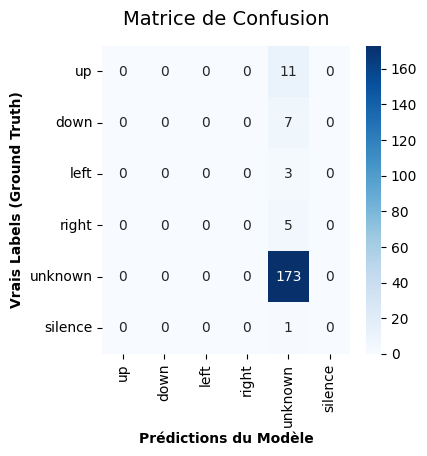

In [ ]:
accuracy, all_preds, all_labels, all_probs, loss = evaluate(model, test_loader)
cm = plot_custom_confusion_matrix(all_preds, all_labels, class_names=data['mapping'])

In [ ]:
plot_roc_curve(all_labels, all_probs, 6)

In [ ]:
plot_precision_recall_curve(all_labels, all_probs, 6)